In this worked notebook file,the Logistic Regression algorithm is applied to a dataset called wildfires.

The dataset has already been split into two different sets: one for training (wildfires_training.csv) and one for testing (wildfires_test.csv)

The dependent variable that we are trying to predict is fire, which can be one of 2 classes: yes or no.

In [1]:
import pandas as pd

# details for beer dataset
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"
independent_cols = ["year", "temp", "humidity", "rainfall", "drought_code", "buildup_index", "day", "month", "wind_speed"]

dependent_col = "fire"

# Here we load our training dataset in from the training file using the pandas library
df_training = pd.read_csv(training_file)
print(df_training.head())
print(df_training.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [2]:
# set up a matrix X containing the independent variables from the training data
X_training = df_training.loc[:,independent_cols]
print(X_training.head())
print(X_training.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [4]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_training = df_training.loc[:,dependent_col]
print(y_training.head())
print(y_training.shape)

0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object
(154,)


In [5]:
# Next we load our test dataset in from the file iris_test.csv
df_test = pd.read_csv(test_file)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [7]:
# set up a matrix X containing the independent variables from the test data
X_test = df_test.loc[:,independent_cols]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [8]:
# Set up a vector y containing the dependent variable / target attribute for the training data
y_test = df_test.loc[:,dependent_col]
print(y_test.head())
print(y_test.shape)

0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object
(50,)


No hyperparameter tuning, default skikit-learn implementation

In [13]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# create a logistic regression model using default settings
#set max_iter to 100 to allow the model to converge properly
model = LogisticRegression(max_iter=1000)
model.fit(X_training, y_training)

# compute predictions for training and test sets
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# compute accuracy for training and test sets
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

print("Accuracy on training data:", accuracy_training)
print("Accuracy on test data:", accuracy_test)

Accuracy on training data: 0.9090909090909091
Accuracy on test data: 0.9


In [18]:
# Now let's evaluate the effect of using different C values

c_values =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
print("C-values", c_values)

accuracy_training_c = []
accuracy_test_c = []
for c in c_values:
    model_c = LogisticRegression(C=c, max_iter=1000)
    model_c.fit(X_training, y_training)

    # compute the predictions for the training and test sets
    predictions_training_c = model_c.predict(X_training)
    predictions_test_c = model_c.predict(X_test)

    # compute the accuracy on the training and test set predictions
    accuracy_training_c.append(metrics.accuracy_score(y_training, predictions_training_c))
    accuracy_test_c.append(metrics.accuracy_score(y_test, predictions_test_c))

print("Accuracy on training data with different C values 0.0001 - 10000", accuracy_training_c)
print("Accuracy on test data with different C values 0.0001 - 10000", accuracy_test_c)

C-values [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Accuracy on training data with different C values 0.0001 - 10000 [0.8701298701298701, 0.8636363636363636, 0.8831168831168831, 0.8961038961038961, 0.9090909090909091, 0.922077922077922, 0.9285714285714286, 0.922077922077922]
Accuracy on test data with different C values 0.0001 - 10000 [0.78, 0.82, 0.84, 0.82, 0.9, 0.88, 0.86, 0.88]


I can see here that the model has it's highest accuragy at the default value, c=1. now I'll try narrow down c-values around 1.

In [21]:
c_values_close_to_one =[0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.25, 1.5, 2, 3, 5, 7, 8]
print("C-values", c_values_close_to_one)

accuracy_training_c_one = []
accuracy_test_c_one = []
for c in c_values_close_to_one:
    model_c_one = LogisticRegression(C=c, max_iter=1000)
    model_c_one.fit(X_training, y_training)

    # compute the predictions for the training and test sets
    predictions_training_c_one = model_c_one.predict(X_training)
    predictions_test_c_one = model_c_one.predict(X_test)

    # compute the accuracy on the training and test set predictions
    accuracy_training_c_one.append(metrics.accuracy_score(y_training, predictions_training_c_one))
    accuracy_test_c_one.append(metrics.accuracy_score(y_test, predictions_test_c_one))

print("Accuracy on training data with different C values 0.1 - 10", accuracy_training_c_one)
print("Accuracy on test data with different C values 0.1 - 10", accuracy_test_c_one)

C-values [0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.25, 1.5, 2, 3, 5, 7, 8, 9, 10]
Accuracy on training data with different C values 0.1 - 10 [0.9025974025974026, 0.9025974025974026, 0.9025974025974026, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9155844155844156, 0.9155844155844156, 0.9155844155844156, 0.922077922077922, 0.922077922077922, 0.922077922077922, 0.922077922077922, 0.922077922077922]
Accuracy on test data with different C values 0.1 - 10 [0.88, 0.88, 0.88, 0.88, 0.88, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.88, 0.88]


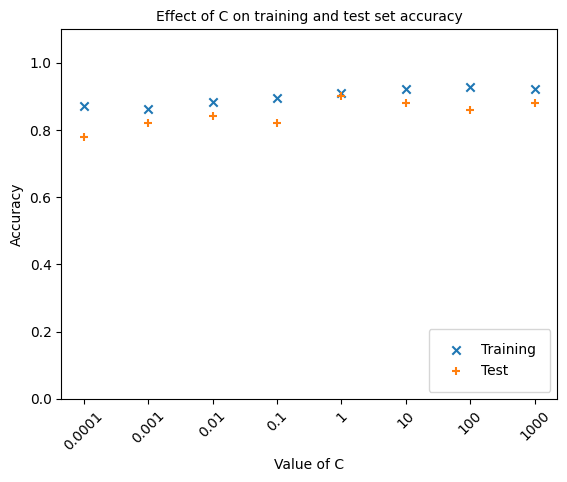

In [23]:
# let's plot the accuracy on the training and test set
import matplotlib.pyplot as plt

# Make indices for plotting
x_positions = range(len(c_values))

plt.scatter(x_positions, accuracy_training_c, marker="x", label="Training")
plt.scatter(x_positions, accuracy_test_c, marker="+", label="Test")

# Replace numeric ticks with the actual C values
plt.xticks(x_positions, c_values, rotation=45)

plt.ylim([0.0, 1.1])
plt.xlabel("Value of C")
plt.ylabel("Accuracy")
plt.legend(loc=4, borderpad=1)
plt.title("Effect of C on training and test set accuracy", fontsize=10)
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

penalty_values = ["l1", "l2", "elasticnet", None]

accuracy_training_c_pen = []
accuracy_test_c_pen = []

for p in penalty_values:
    acc_train = []
    acc_test = []
    for c in c_values:
        if p == "l1":
            solver = "liblinear"   # l1 works with liblinear or saga
            model_c_pen = LogisticRegression(C=c, penalty=p, solver=solver, max_iter=10000)
        elif p == "elasticnet":
            solver = "saga"
            model_c_pen = LogisticRegression(C=c, penalty=p, solver=solver, max_iter=10000, l1_ratio=0.5)
        else:  # "l2" or "none"
            solver = "lbfgs"
            model_c_pen = LogisticRegression(C=c, penalty=p, solver=solver, max_iter=10000)

        model_c_pen.fit(X_training, y_training)
        predictions_train_c_pen = model_c_pen.predict(X_training)
        predictions_test_c_pen = model_c_pen.predict(X_test)

        acc_train.append(metrics.accuracy_score(y_training, predictions_train_c_pen))
        acc_test.append(metrics.accuracy_score(y_test, predictions_test_c_pen))

    accuracy_training_c_pen.append(acc_train)
    accuracy_test_c_pen.append(acc_test)

print("Training accuracies (per penalty):", accuracy_training_c_pen)
print("Test accuracies (per penalty):", accuracy_test_c_pen)



Training accuracies (per penalty): [[0.487012987012987, 0.8051948051948052, 0.8636363636363636, 0.8831168831168831, 0.922077922077922, 0.922077922077922, 0.922077922077922, 0.9285714285714286], [0.8701298701298701, 0.8636363636363636, 0.8831168831168831, 0.8961038961038961, 0.9090909090909091, 0.922077922077922, 0.9285714285714286, 0.922077922077922], [0.512987012987013, 0.8051948051948052, 0.8636363636363636, 0.8701298701298701, 0.8701298701298701, 0.8701298701298701, 0.8701298701298701, 0.8701298701298701], [0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286]]
Test accuracies (per penalty): [[0.44, 0.7, 0.78, 0.84, 0.88, 0.86, 0.88, 0.9], [0.78, 0.82, 0.84, 0.82, 0.9, 0.88, 0.86, 0.88], [0.56, 0.7, 0.78, 0.82, 0.8, 0.8, 0.8, 0.8], [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]]


/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ciarangray/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ciarangray/Li

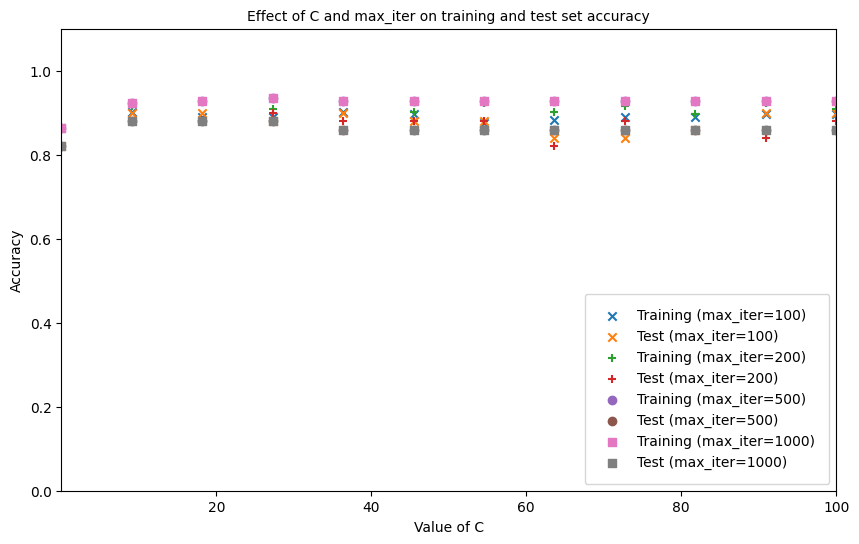

In [26]:

plt.figure(figsize=(10, 6))
markers = ["x", "+", "o", "s"]  # Different markers for each max_iter

for idx, mi in enumerate(max_iter_values):
    plt.scatter(c_values, accuracy_training_c_mi[idx], marker=markers[idx], label=f"Training (max_iter={mi})")
    plt.scatter(c_values, accuracy_test_c_mi[idx], marker=markers[idx], label=f"Test (max_iter={mi})")

plt.xlim([min(c_values), max(c_values)])
plt.ylim([0.0, 1.1])
plt.xlabel("Value of C")
plt.ylabel("Accuracy")
plt.legend(loc=4, borderpad=1)
plt.title("Effect of C and max_iter on training and test set accuracy", fontsize=10)
plt.show()